# Aerofit Case study


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binom

In [ ]:
pwd

'/content'

# Basic descriptive metrics about the data set

In [2]:
df=pd.read_csv('aerofit_treadmill.csv')

In [3]:
dfs=df.copy()

In [4]:
dfs.shape

(180, 9)

In [5]:
dfs.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [124]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [6]:
dfs.value_counts()

Product  Age  Gender  Education  MaritalStatus  Usage  Fitness  Income  Miles
KP281    18   Male    14         Single         3      4        29562   112      1
KP481    30   Female  13         Single         4      3        46617   106      1
         31   Female  16         Partnered      2      3        51165   64       1
                      18         Single         2      1        65220   21       1
              Male    16         Partnered      3      3        52302   95       1
                                                                                ..
KP281    34   Female  16         Single         2      2        52302   66       1
              Male    16         Single         4      5        51165   169      1
         35   Female  16         Partnered      3      3        60261   94       1
                      18         Single         3      3        67083   85       1
KP781    48   Male    18         Partnered      4      5        95508   180      1
Name: cou

# Non Visual analysis /Outliers Detection





In [7]:
#Finding mean of age,income,education for each product
dfage=dfs.groupby('Product')['Age'].mean().reset_index()
dfincome=dfs.groupby('Product')['Income'].mean().reset_index()
dfeducation=dfs.groupby('Product')['Education'].mean().reset_index()

In [8]:
merged_mean_df1=pd.merge(dfage,dfincome,how='inner',on='Product')
merged_mean_df=pd.merge(merged_mean_df1,dfeducation,how='inner',on='Product')

In [9]:
merged_mean_df

,Product,Age,Income,Education
0,KP281,28.55,46418.025,15.037500
1,KP481,28.90,48973.650,15.116667
2,KP781,29.10,75441.575,17.325000


In [31]:
cross_tab=pd.crosstab(dfs['Product'],dfs['Gender'])
cross_tab

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


Finding the Most valuable Product

<Axes: xlabel='Product'>

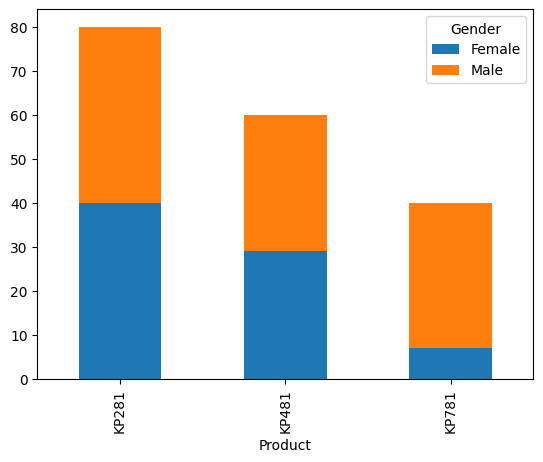

In [22]:
cross_tab.plot(kind='bar',stacked=True)

In [24]:
cross_tab2=pd.crosstab(dfs['Product'],dfs['MaritalStatus'])
cross_tab2

MaritalStatus,Partnered,Single
Product,,
KP281,48,32
KP481,36,24
KP781,23,17


<Axes: xlabel='Product'>

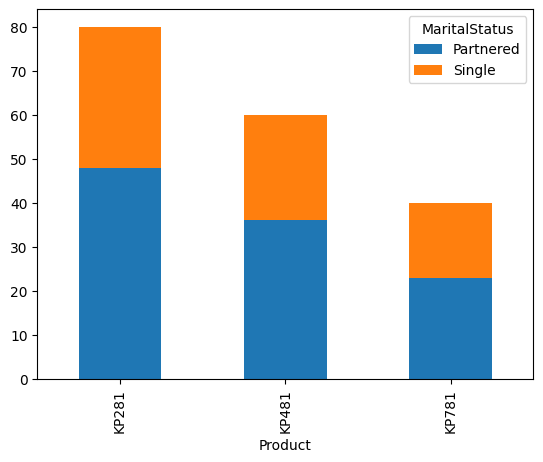

In [25]:
cross_tab2.plot(kind='bar',stacked=True)

From the above two cross tabs we can generalize that married customers are more likely to buy a product than singles and though total Male customers are higher ovreall ,Female cutomers dominate charts for KP781.

Finding the product which is generating more revenue

In [115]:
KP281 = 1500
KP481 = 1750
KP781 = 2500
KP281_dfs=len(dfs[dfs['Product']=='KP281'])
KP481_dfs=len(dfs[dfs['Product']=='KP481'])
KP781_dfs=len(dfs[dfs['Product']=='KP781'])
Revenue_KP281=KP281*KP281_dfs
Revenue_KP481=KP481*KP481_dfs
Revenue_KP781=KP781*KP781_dfs
print(f"Revenue for KP281 is {Revenue_KP281}")
print(f"Revenue for KP481 is {Revenue_KP481}")
print(f"Revenue for KP781 is {Revenue_KP781}")

Revenue for KP281 is 120000
Revenue for KP481 is 105000
Revenue for KP781 is 100000


In [118]:
Total_Revenue=Revenue_KP281+Revenue_KP481+Revenue_KP781
Total_Rev_KP281=Revenue_KP281/Total_Revenue
Total_Rev_KP481=Revenue_KP481/Total_Revenue
Total_Rev_KP781=Revenue_KP781/Total_Revenue
if Total_Rev_KP281>Total_Rev_KP481 and Total_Rev_KP281>Total_Rev_KP781:
  print(f"KP281 is most valuable Product")
  print(f"Revenue share for KP281 is {np.round(Total_Rev_KP281,2)*100} percent")
elif Total_Rev_KP481>Total_Rev_KP281 and Total_Rev_KP481>Total_Rev_KP781:
  print(f"KP481 is most valuable Product")
  print(f"Revenue share for KP481 is {np.round(Total_Rev_KP481,2)*100} percent")
else:
  print(f"KP781 is most valuable Product")
  print(f"Revenue share for KP781 is {np.round(Total_Rev_KP781,2)*100} percent")

KP281 is most valuable Product
Revenue share for KP281 is 37.0 percent


In [10]:
dfs.describe()#Overall Stats



,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [11]:
#IQR and Outlier Detection
dict={}
for col in ['Age','Education','Usage','Fitness','Income','Miles']:
  describe=dfs.describe()#Overall Stats
  IQR=describe.loc[['25%','75%']]
  description = IQR[col]
  Q1 = description['25%']
  Q3 = description['75%']
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  dict[col] = [lower_bound,upper_bound]



In [12]:
dict

{'Age': [10.5, 46.5],
 'Education': [11.0, 19.0],
 'Usage': [1.5, 5.5],
 'Fitness': [1.5, 5.5],
 'Income': [22144.875, 80581.875],
 'Miles': [-7.125, 187.875]}

In [13]:
#Outliers Detection using description method
data={}
data=pd.DataFrame(data)
for i in ['Age','Education','Usage','Fitness','Income','Miles']:
  outliers=dfs[(dfs[i]<dict[i][0]) | (dfs[i]>dict[i][1])]
  data=pd.concat([data,outliers])
data.drop_duplicates(inplace=True)


In total We have 34 outliers in the dataset with respect to each numerical column, let verify this by plotting a box plot

In [14]:
data.shape

(34, 9)

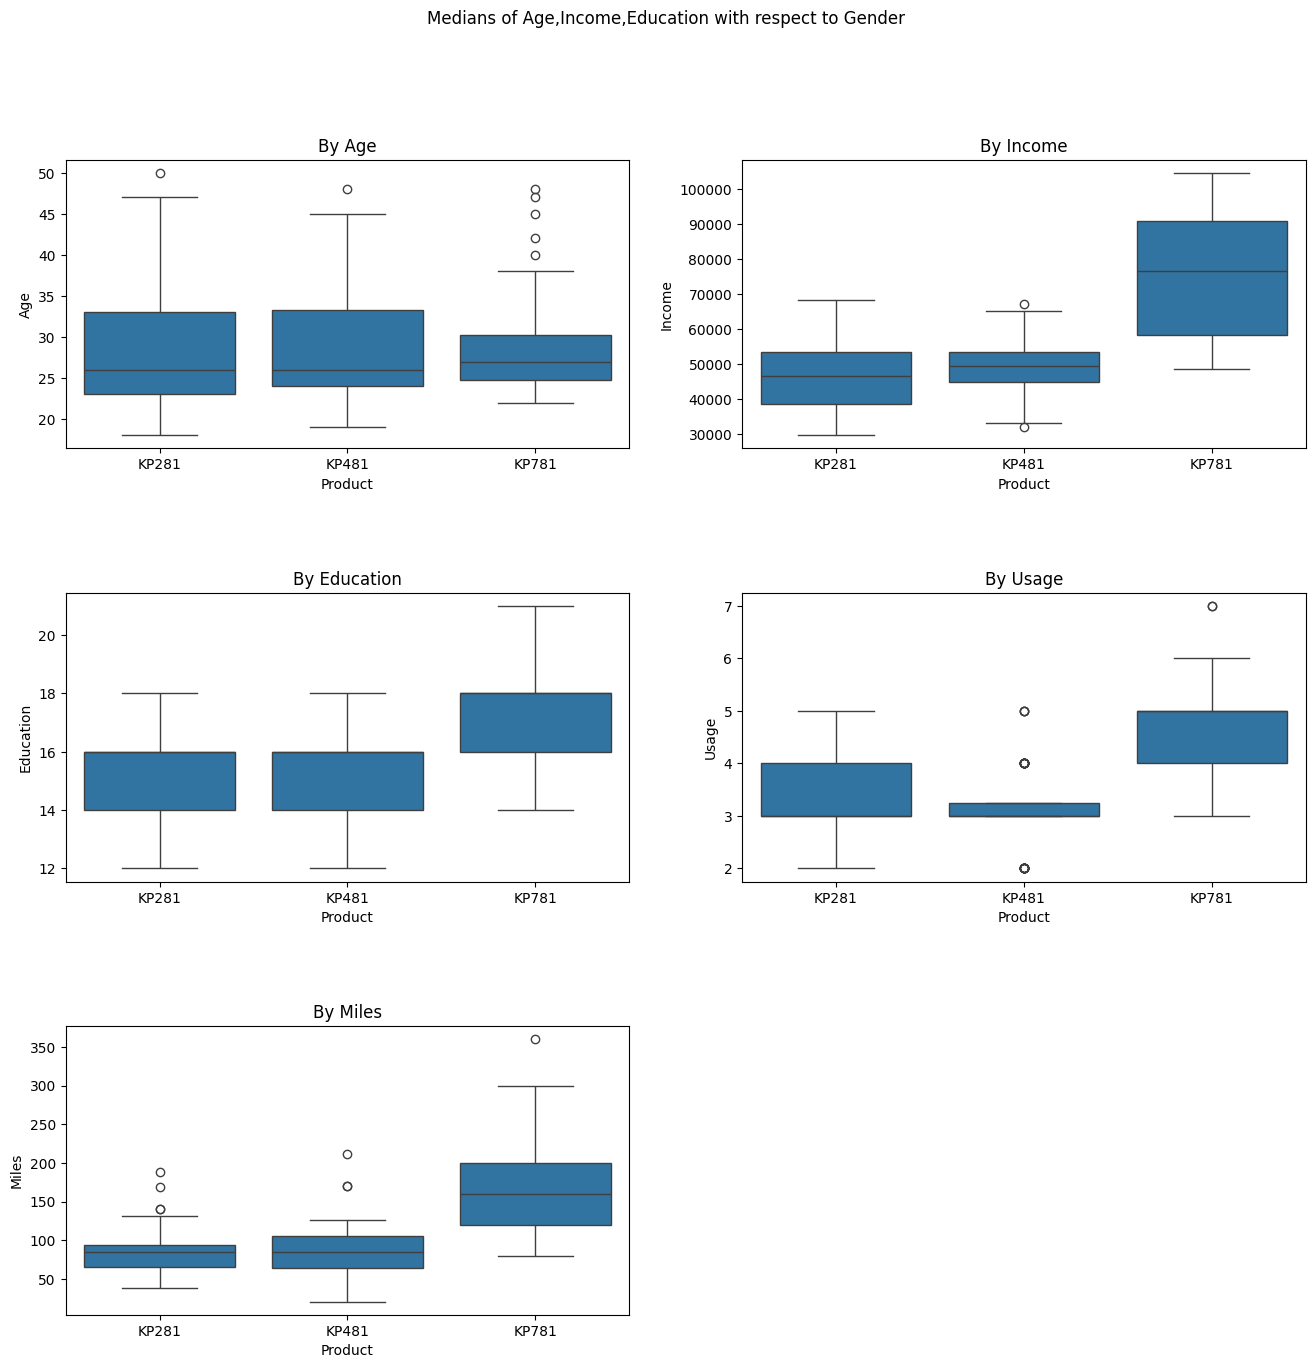

In [15]:
fig=plt.figure(figsize=(16,15))
plt.subplot(3,2,1)
sns.boxplot(x='Product',y='Age',data=dfs)
plt.title('By Age')
plt.subplot(3,2,2)
sns.boxplot(x='Product',y='Income',data=dfs)
plt.title('By Income')
plt.subplot(3,2,3)
sns.boxplot(x='Product',y='Education',data=dfs)
plt.title('By Education')
plt.subplot(3,2,4)
sns.boxplot(x='Product',y='Usage',data=dfs)
plt.title('By Usage')
fig.suptitle('Medians of Age,Income,Education with respect to Gender')
plt.subplot(3,2,5)
sns.boxplot(x='Product',y='Miles',data=dfs)
plt.title('By Miles')
fig.suptitle('Medians of Age,Income,Education with respect to Gender')
plt.subplots_adjust(hspace=0.5)
plt.show()

Here Theoritical outliers are almost equal to partical outlier

# **Visual Analsis**

<ipython-input-75-159fd032db7c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Product',data=dfs,palette='tab20c')


Text(0.5, 1.0, 'Product Count')

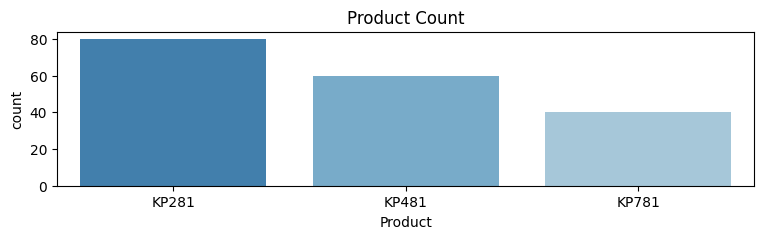

In [ ]:
plt.figure(figsize=(9,2))
sns.countplot(x='Product',data=dfs,palette='tab20c')
plt.title('Product Count')

Text(0.5, 1.0, 'Product Count')

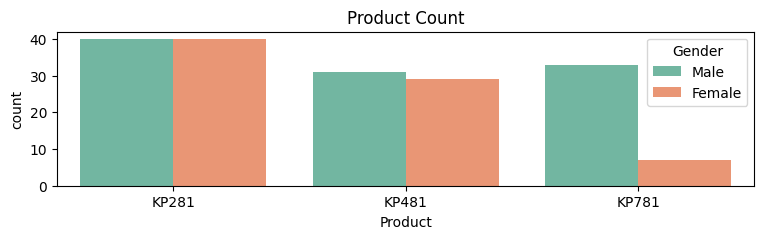

In [ ]:
plt.figure(figsize=(9,2))
sns.countplot(x='Product',hue='Gender',data=dfs,palette='Set2')
plt.title('Product Count')

**Observations:**
1. KP281 is the most used Product across genders and having almost equal share of data.
2.KP781 is the least used product of all but it second most used among Male unlike  KP481 which is second most used among Female.


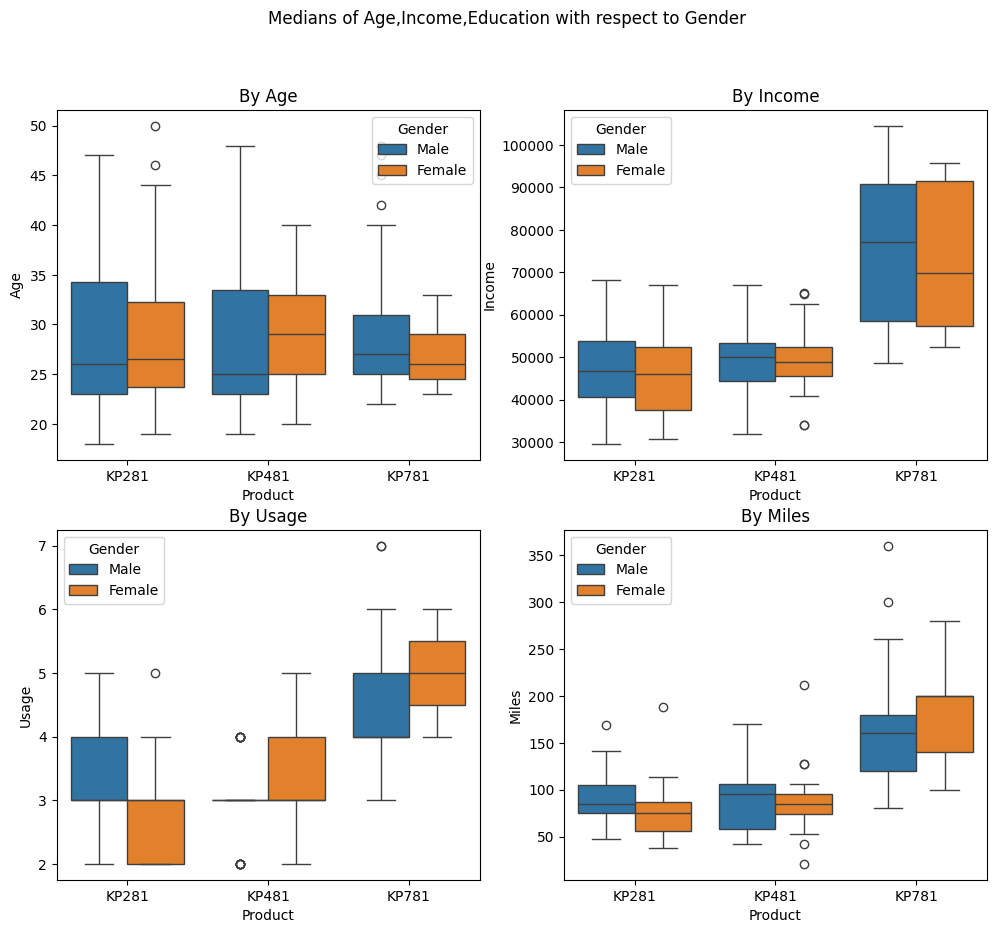

In [ ]:
fig=plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='Product',y='Age',hue='Gender',data=dfs)
plt.title('By Age')
plt.subplot(2,2,2)
sns.boxplot(x='Product',y='Income',hue='Gender',data=dfs)
plt.title('By Income')
plt.subplot(2,2,3)
sns.boxplot(x='Product',y='Usage',hue='Gender',data=dfs)
plt.title('By Usage')
fig.suptitle('Medians of Age,Income,Education with respect to Gender')
plt.subplot(2,2,4)
sns.boxplot(x='Product',y='Miles',hue='Gender',data=dfs)
plt.title('By Miles')
fig.suptitle('Medians of Age,Income,Education with respect to Gender')
#plt.subplots_adjust(hspace=0.5)
plt.show()



**Observations**


1. With respect to Age younger Males who are around teh age of 25 are likelt to choose between KP281 aand KP481.Females who are higer than 25 years of age are likely to choose KP481
2. With Respect to Income,people getting KP781 has higher incoe then rest of the people for both Male and Female.
3. With respect to MIles, KP781 has highest median irrespective of male or female for average miles ran/walker per week, which makes it most used product,Same can be observed in terms of usage too.











# **Visualising the Effect of Marital status/Age**

Text(0.5, 1.0, 'Product Count')

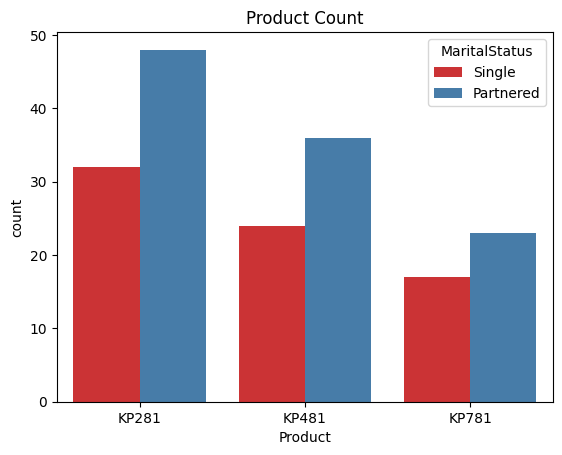

In [ ]:
sns.countplot(x='Product',hue='MaritalStatus',data=dfs,palette='Set1')
plt.title('Product Count')

**Observation**
KP281 is the most used product amoung Married/single individuals and KP781 is least used product amoung Married/single individuals.But in each case married indiduals dominate the product usage/purchases so we can say a married indidual is like to purchase a product than an sigle customer.

<Axes: xlabel='Age', ylabel='Count'>

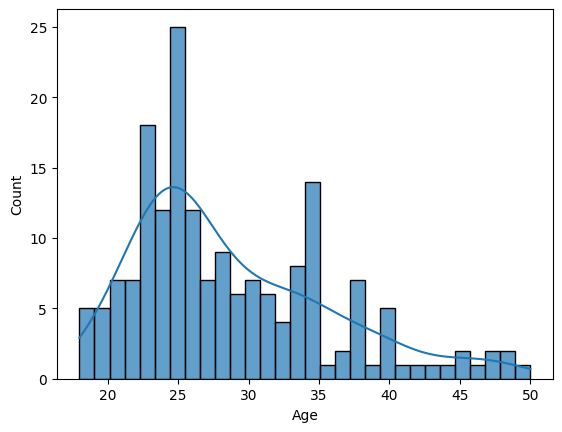

In [ ]:
sns.histplot(dfs['Age'],bins=30,kde=True,edgecolor='k', alpha=0.7)

(20000.0, 100000.0)

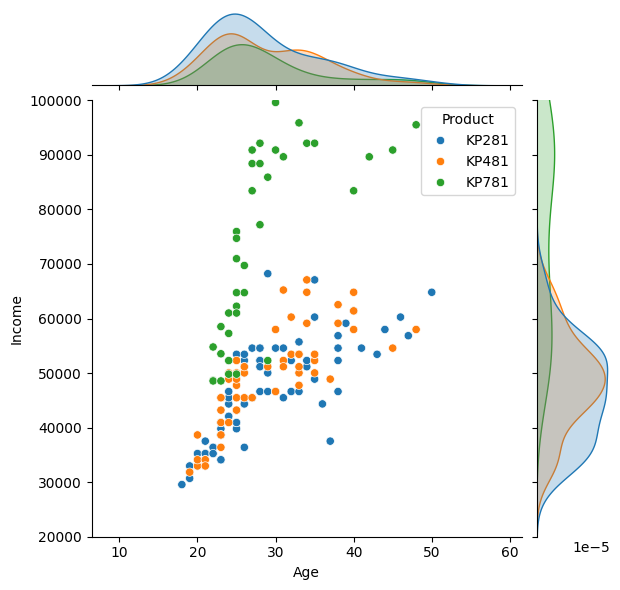

In [ ]:
sns.jointplot(x='Age',y='Income',hue='Product',data=dfs)
plt.ylim(20000, 100000)

**Observation**

1. As we can see from above histogram we can find customers mostly fall under the greather than 21 and less than 29 age group and their product prefrence is between KP281 and Kp481(as we also observed the same in previous plots).*But the negative trend we can see from the joint plot is that customers who are older and have income less than 50000$ are very less likely to pick up KP781.*

2. We can also see from the income distribution that KP481 has its customer mostly from the income range between 40K$ to 60K$, where as Kp281 has income range starting a little ore than 30K$ and 50K$, Based on this we can categorize our customers into three classes, *lower middle ,upper middle and high class*.





In [46]:
corr_data_KP281=dfs[dfs['Product']=='KP281']
corr_data_KP281=corr_data_KP281[corr_data_KP281.columns[[1,3,5,6,7,8]]]
corr_data_KP481=dfs[dfs['Product']=='KP481']
corr_data_KP481=corr_data_KP481[corr_data_KP481.columns[[1,3,5,6,7,8]]]
corr_data_KP781=dfs[dfs['Product']=='KP781']
corr_data_KP781=corr_data_KP781[corr_data_KP781.columns[[1,3,5,6,7,8]]]



In [48]:
corr_data_KP781.shape

(40, 6)

In [49]:
corr_data_KP281.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.336268,-0.015342,0.054469,0.751831,-0.064632
Education,0.336268,1.000000,0.169369,0.111379,0.446551,0.111956
Usage,-0.015342,0.169369,1.000000,0.468825,-0.052227,0.645576
Fitness,0.054469,0.111379,0.468825,1.000000,0.005906,0.826177
Income,0.751831,0.446551,-0.052227,0.005906,1.000000,-0.039377
Miles,-0.064632,0.111956,0.645576,0.826177,-0.039377,1.000000


In [50]:
corr_data_KP481.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.472956,-0.078458,-0.026730,0.787550,-0.124710
Education,0.472956,1.000000,-0.112105,-0.094660,0.540207,-0.240293
Usage,-0.078458,-0.112105,1.000000,0.349996,0.073367,0.673648
Fitness,-0.026730,-0.094660,0.349996,1.000000,-0.008086,0.676894
Income,0.787550,0.540207,0.073367,-0.008086,1.000000,-0.054691
Miles,-0.124710,-0.240293,0.673648,0.676894,-0.054691,1.000000


In [51]:
corr_data_KP781.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.167617,0.120007,0.212141,0.713489,0.243106
Education,0.167617,1.000000,-0.017758,-0.166991,0.252306,-0.228587
Usage,0.120007,-0.017758,1.000000,0.228182,0.281543,0.503106
Fitness,0.212141,-0.166991,0.228182,1.000000,0.110507,0.391083
Income,0.713489,0.252306,0.281543,0.110507,1.000000,0.309289
Miles,0.243106,-0.228587,0.503106,0.391083,0.309289,1.000000


Text(0.5, 1.0, 'KP781')

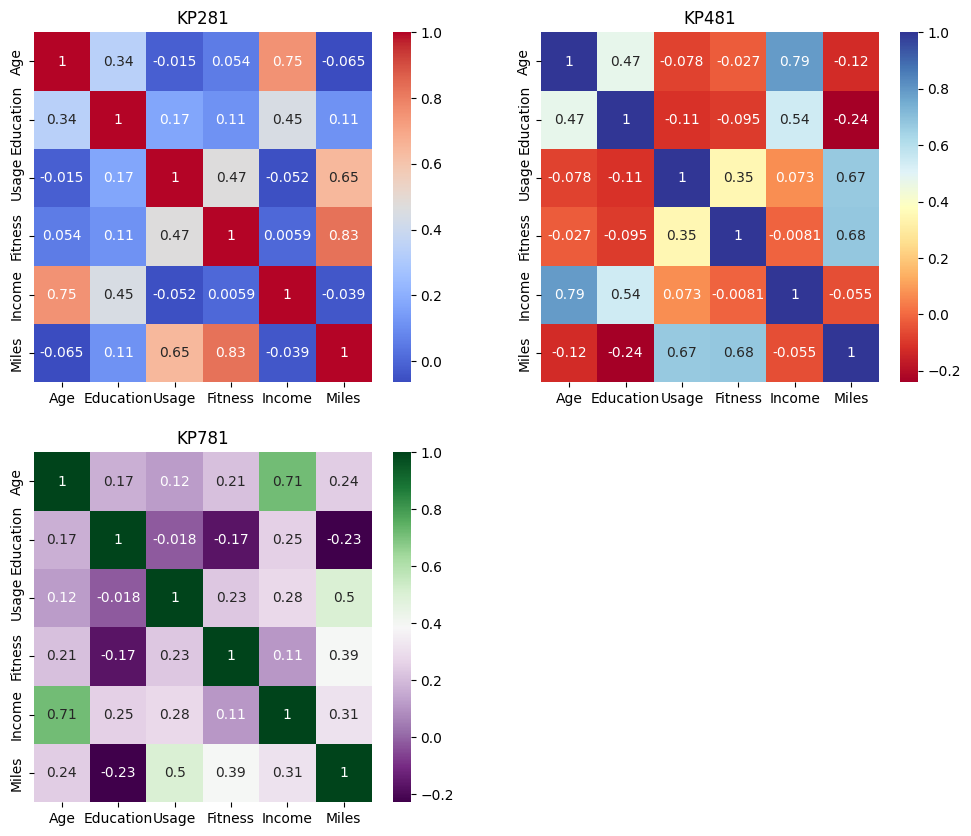

In [62]:
fig=plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.heatmap(corr_data_KP281.corr(), cmap= "coolwarm", annot=True)
plt.title('KP281')
plt.subplot(2,2,2)
sns.heatmap(corr_data_KP481.corr(), cmap= "RdYlBu", annot=True)
plt.title('KP481')
plt.subplot(2,2,3)
sns.heatmap(corr_data_KP781.corr(), cmap= "PRGn", annot=True)
plt.title('KP781')

**Observations**
1.KP281: With respect to age there exists a week correlation for usage,fitness and Miles wich tells us for these customer as age rises they are less likely to use the product.The only bright spot here is correlation between age and income which is strong , meaning income rises with age significantly.

2. Kp481: The Same strory for KP281 repeats here also with almost similar observation.

3. KP781: Surprisingly here we can see a close  marginal correlation which is better than the other two product and the rise with income and age we say earlier cannot be seen in this case.

# Defining Probabilities

In [63]:
dfs.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [67]:
#Lets find proabability of a customer being male or female.
p_Male=len(dfs[dfs['Gender']=='Male'])/len(dfs)
p_Female=len(dfs[dfs['Gender']=='Female'])/len(dfs)
p_Male,p_Female=np.round(p_Male,2),np.round(p_Female,2)
print(f"Probability of a Male customer is {p_Male} and Probability of a Female customer is {p_Female}")

Probability of a Male customer is 0.58 and Probability of a Female customer is 0.42


In [69]:
#Similarly lets find the probability of customer being Married or single
p_Married=len(dfs[dfs['MaritalStatus']=='Partnered'])/len(dfs)
p_Single=len(dfs[dfs['MaritalStatus']=='Single'])/len(dfs)
p_Married,p_Single=np.round(p_Married,2),np.round(p_Single,2)
print(f"Probability of a Married customer is {p_Married} and Probability of a Single customer is {p_Single}")

Probability of a Married customer is 0.59 and Probability of a Single customer is 0.41


In [80]:
#Lets find the probability that a customer being Male given that he is Married
p_Male_Married=len(dfs[(dfs['Gender']=='Male') & (dfs['MaritalStatus']=='Partnered')])/len(dfs)
p_Male_Married_cond=p_Male_Married/p_Married
p_Male_Married_cond=np.round(p_Male_Married_cond,2)
p_Male_Single=len(dfs[(dfs['Gender']=='Male') & (dfs['MaritalStatus']=='Single')])/len(dfs)
p_Male_Single_cond=p_Male_Single/p_Single
p_Male_Single_cond=np.round(p_Male_Single_cond,2)
print(f"Probability of a Male customer given that he Married is {p_Male_Married_cond}",end=' ')
print(f"Probability of a Male customer given that he Single is {p_Male_Single_cond}")

Probability of a Male customer given that he Married is 0.57 Probability of a Male customer given that he Single is 0.58


In [98]:
cross_margins=pd.crosstab(dfs['Product'],dfs['Gender'],margins=True,margins_name='Total')
cross_margins

Gender,Female,Male,Total
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
Total,76,104,180


In [109]:
#From the above cross tab we can answer some questions like percent of cutomers for KP481
percent_KP481=cross_margins.iloc[1,2]/cross_margins.iloc[3,2]
percent_KP281=cross_margins.iloc[0,2]/cross_margins.iloc[3,2]
percent_KP781=cross_margins.iloc[2,2]/cross_margins.iloc[3,2]
print(f"Percent of KP481 customers is {np.round(percent_KP481,2)*100}")
print(f"Percent of KP281 customers is {np.round(percent_KP281,2)*100}")
print(f"Percent of KP781 customers is {np.round(percent_KP781,2)*100}")


Percent of KP481 customers is 33.0
Percent of KP281 customers is 44.0
Percent of KP781 customers is 22.0


In [84]:
pd.crosstab(dfs['Product'],dfs['Gender'],margins=True,normalize='index')

Gender,Female,Male
Product,,
KP281,0.500000,0.500000
KP481,0.483333,0.516667
KP781,0.175000,0.825000
All,0.422222,0.577778


Here we can seet he conditional probabilitied of each case for example in the 2nd row 2nd column we have probability of a customer being male givent that customer buys KP481 is being defined i.r P(M/KP481) similarly there are other like p(F/KP281),P(M/KP781) etc are also being define in the above table. we can access these probabilities using iloc.

In [112]:
pd.crosstab(columns=dfs['Product'],index=dfs['Gender'],margins=True,normalize='index')

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308
All,0.444444,0.333333,0.222222


In [123]:
pd.crosstab(columns=dfs['Product'],index=dfs['MaritalStatus'],margins=True,normalize='index')

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.448598,0.336449,0.214953
Single,0.438356,0.328767,0.232877
All,0.444444,0.333333,0.222222


Similarly we can also find the probabilities like P(KP281/M),P(KP281/F) etc like above.

In [114]:
pd.crosstab(columns=dfs['Product'],index=[dfs['Gender'],dfs['MaritalStatus']],margins=True,normalize='columns')

Product                KP281     KP481  KP781       All
Gender MaritalStatus                                   
Female Partnered      0.3375  0.250000  0.100  0.255556
       Single         0.1625  0.233333  0.075  0.166667
Male   Partnered      0.2625  0.350000  0.475  0.338889
       Single         0.2375  0.166667  0.350  0.238889

Here are seeing the proababilities like probability of a customer being feamle and partnered given that she bought KP281 i.e P(F and Partnered/KP281). In this way we can

# Conclusion

1.**KP281:** This product is the most valuable product with high customer share.The target audience should be younger ones who's usage is not very high and looking for a value for money product. The Gender divident is also uniform for this product which makes it even easier to market among the customers who's proababilty of being Married is higher than rest of the product customers which can also contribute to the market share.

2.**KP481:** This product is the second most valuable product.The target audience are very close to that of KP281 and the median age is little higher,but the customers who bought KP482 has better usage of the product than KP281 , Gender divident is dominated by male and probability of customer being married individual are slightly lower than  KP281. These customers have better income than that of customers of KP281, Infact higher the age there is more likly to be a hight income customer that all the products which can help to increase the revenue of this product with value feature additions.Here also the gender devident is almost equal which is good for marketing.

**3.KP781:** This is the costliest and least revenue generating product. The customer are likly to be older than test of the two product and their usage is very marginal,Gender divident aligns towards male highly which makes male customers highly valuable.This has the least cusotmer share who's income median income is higher than rest of the customers. This product can be considered to be premium and targeting a partiular customers who's income is high and are of older age who usage is marginal.